# Etown Women's Basketball Win Prediction

## Data loading

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings # hides warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [5]:
import os

player_data_list = []
team_data_list = []

directory = "./player_game_stats/"
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        player_data_list.append(df)
print(f"Loaded {len(player_data_list)} player data csv files.")

directory = "./team_game_stats/"
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        team_data_list.append(df)
print(f"Loaded {len(team_data_list)} team data csv files.")


Loaded 651 player data csv files.
Loaded 651 team data csv files.


In [6]:
player_stats = pd.concat(player_data_list, axis=0)
team_stats = pd.concat(team_data_list, axis=0)

In [7]:
display(player_stats.shape)
display(player_stats.head())
display(player_stats.info())
display(player_stats.describe())
display(player_stats.isnull().sum())

(14864, 17)

##              Player GS MIN    FG  3PT   FT ORB-DRB  REB  PF  A  TO  BLK  \
0  12         Boggs,Gabby  *  40  8-14  0-0  7-9    5-10   15   2  4   3    4   
1  24          Rauf,Amina  *  36  3-12  0-3  5-8     1-3    4   2  1   1    0   
2  22      Edmond,Orianna  *  24   3-6  0-0  5-6     4-2    6   2  0   3    0   
3   1     Dover,Mackenzie  *  36  2-11  1-4  2-2     3-5    8   2  5   5    0   
4   3  Williamson,Lindsey  *  25   1-8  1-2  0-0     1-1    2   0  2   1    0   

   STL  PTS              Team                                         game_id  
0    1   23  Albright College  Albright College_Moravian University_11-9-2022  
1    0   11  Albright College  Albright College_Moravian University_11-9-2022  
2    1   11  Albright College  Albright College_Moravian University_11-9-2022  
3    0    7  Albright College  Albright College_Moravian University_11-9-2022  
4    0    3  Albright College  Albright College_Moravian University_11-9-2022

<class 'pandas.core.frame.DataFrame'>
Index: 14864 entries, 0 to 21
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ##       14864 non-null  object
 1   Player   14864 non-null  object
 2   GS       6510 non-null   object
 3   MIN      14864 non-null  object
 4   FG       14864 non-null  object
 5   3PT      14864 non-null  object
 6   FT       14864 non-null  object
 7   ORB-DRB  14864 non-null  object
 8   REB      14864 non-null  int64 
 9   PF       14864 non-null  int64 
 10  A        14864 non-null  int64 
 11  TO       14864 non-null  int64 
 12  BLK      14864 non-null  int64 
 13  STL      14864 non-null  int64 
 14  PTS      14864 non-null  int64 
 15  Team     14864 non-null  object
 16  game_id  14864 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.0+ MB


None

REB            PF             A            TO           BLK  \
count  14864.000000  14864.000000  14864.000000  14864.000000  14864.000000   
mean       3.169537      1.439316      1.137043      1.512244      0.296757   
std        3.059380      1.342840      1.480635      1.663993      0.690377   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        2.000000      1.000000      1.000000      1.000000      0.000000   
75%        5.000000      2.000000      2.000000      2.000000      0.000000   
max       23.000000      6.000000     15.000000     21.000000     10.000000   

                STL           PTS  
count  14864.000000  14864.000000  
mean       0.803821      5.472215  
std        1.142005      5.822861  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      4.000000  
75%        1.000000      8.000000  
max       10.000000     43.000000

##            0
Player        0
GS         8354
MIN           0
FG            0
3PT           0
FT            0
ORB-DRB       0
REB           0
PF            0
A             0
TO            0
BLK           0
STL           0
PTS           0
Team          0
game_id       0
dtype: int64

In [8]:
display(team_stats.shape)
display(team_stats.head())
display(team_stats.info())
display(team_stats.describe())
display(team_stats.isnull().sum())

(1302, 20)

game_id                 Team  \
0  Albright College_Moravian University_11-9-2022     Albright College   
1  Albright College_Moravian University_11-9-2022  Moravian University   
0                     Albright_Goucher_11-11-2023             Albright   
1                     Albright_Goucher_11-11-2023              Goucher   
0                    Albright_Moravian_11-15-2024             Albright   

  Home/Away        Date  Attendance  \
0      home   11-9-2022       317.0   
1      away   11-9-2022       317.0   
0      home  11-11-2023       158.0   
1      away  11-11-2023       158.0   
0      home  11-15-2024       135.0   

                                            Site  \
0                                  Johnston Hall   
1                                  Johnston Hall   
0  Decker Sports & Recreation Center, Towson, MD   
1  Decker Sports & Recreation Center, Towson, MD   
0                   Johnston Hall, Bethlehem, PA   

                                            Referees  MIN     FG   3PT     FT  \
0          Sharvez Brown, Bobby Hoppe, Stacey Smalls  200  20-59  2-11  22-31   
1          Sharvez Brown, Bobby Hoppe, Stacey Smalls  200  29-70   4-9    4-8   
0  Samantha Jackson, Amanda Censullo-Mioni, Ronal...  200  33-83  6-18  13-21   
1  Samantha Jackson, Amanda Censullo-Mioni, Ronal...  200  18-53  7-20   6-14   
0         Brian Callahan, Morgan Faust, Barry Vaughn  200  26-56   4-9  11-17   

  ORB-DRB  REB  PF   A  TO  BLK  STL  PTS Notes  
0   21-30   51  12  12  17    5    3   64   NaN  
1   13-23   36  24  17  11    7    6   66   NaN  
0   29-31   60  15  20  21    2   13   85   NaN  
1    7-28   35  22   8  32    1    9   49   NaN  
0   13-26   39  16  11  20    6    6   67   NaN

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game_id     1302 non-null   object 
 1   Team        1302 non-null   object 
 2   Home/Away   1302 non-null   object 
 3   Date        1302 non-null   object 
 4   Attendance  1220 non-null   float64
 5   Site        1302 non-null   object 
 6   Referees    742 non-null    object 
 7   MIN         1302 non-null   int64  
 8   FG          1302 non-null   object 
 9   3PT         1302 non-null   object 
 10  FT          1302 non-null   object 
 11  ORB-DRB     1302 non-null   object 
 12  REB         1302 non-null   int64  
 13  PF          1302 non-null   int64  
 14  A           1302 non-null   int64  
 15  TO          1302 non-null   int64  
 16  BLK         1302 non-null   int64  
 17  STL         1302 non-null   int64  
 18  PTS         1302 non-null   int64  
 19  Notes       172 non-null    object 

None

Attendance          MIN          REB          PF            A  \
count  1220.000000  1302.000000  1302.000000  1302.00000  1302.000000   
mean    207.214754   200.917051    40.507680    16.43318    12.980799   
std     152.577413     5.776855     8.988738     4.79284     5.400951   
min       7.000000   150.000000    15.000000     5.00000     1.000000   
25%     112.000000   200.000000    35.000000    13.00000     9.000000   
50%     168.500000   200.000000    40.000000    16.00000    12.000000   
75%     244.000000   200.000000    46.000000    20.00000    16.000000   
max    1345.000000   250.000000    79.000000    36.00000    34.000000   

                TO          BLK          STL         PTS  
count  1302.000000  1302.000000  1302.000000  1302.00000  
mean     17.788018     3.387865     9.176651    62.47235  
std       6.565784     2.346458     4.790890    15.97660  
min       4.000000     0.000000     0.000000    14.00000  
25%      13.000000     2.000000     6.000000    52.00000  
50%      17.000000     3.000000     8.000000    62.00000  
75%      21.000000     5.000000    11.000000    73.00000  
max      59.000000    12.000000    42.000000   135.00000

game_id          0
Team             0
Home/Away        0
Date             0
Attendance      82
Site             0
Referees       560
MIN              0
FG               0
3PT              0
FT               0
ORB-DRB          0
REB              0
PF               0
A                0
TO               0
BLK              0
STL              0
PTS              0
Notes         1130
dtype: int64

## Data Cleaning

In [9]:
player_stats.drop(columns=['GS'], inplace=True)
team_stats.drop(columns=['Attendance','Referees','Notes'], inplace=True) # Null columns


##### Clean & standardize Player names

In [401]:
display(player_stats['Player'].nunique())

def reformatted_names_mask(name):
    name = name.strip()
    if ',' in name:
        l_f_names = [n.strip() for n in name.split(',')]
        name = l_f_names[1]+' '+l_f_names[0]
    return name

player_stats['Player'] = player_stats['Player'].apply(reformatted_names_mask)
player_stats['Player'].apply(reformatted_names_mask).nunique()

2409

2409

In [10]:
print('Player Stats')
display(player_stats.isnull().sum())
print('Team Stats')
display(team_stats.isnull().sum())

Player Stats


##         0
Player     0
MIN        0
FG         0
3PT        0
FT         0
ORB-DRB    0
REB        0
PF         0
A          0
TO         0
BLK        0
STL        0
PTS        0
Team       0
game_id    0
dtype: int64

Team Stats


game_id      0
Team         0
Home/Away    0
Date         0
Site         0
MIN          0
FG           0
3PT          0
FT           0
ORB-DRB      0
REB          0
PF           0
A            0
TO           0
BLK          0
STL          0
PTS          0
dtype: int64

### Extract data from String columns

In [11]:
team_stats['FG%'] = team_stats['FG'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
team_stats['3PT%'] = team_stats['3PT'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
team_stats['FT%'] = team_stats['FT'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
team_stats['ORB'] = team_stats['ORB-DRB'].apply(lambda x: int(x.split('-')[0]))
team_stats['DRB'] = team_stats['ORB-DRB'].apply(lambda x: int(x.split('-')[1]))

team_stats.drop(columns=['FG', '3PT', 'FT', 'ORB-DRB'], inplace=True)

In [12]:
player_stats['FG%'] = player_stats['FG'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
player_stats['3PT%'] = player_stats['3PT'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
player_stats['FT%'] = player_stats['FT'].apply(lambda x: int(x.split('-')[0]) / int(x.split('-')[1]) if int(x.split('-')[1])!=0 else 0)
player_stats['ORB'] = player_stats['ORB-DRB'].apply(lambda x: int(x.split('-')[0]))
player_stats['DRB'] = player_stats['ORB-DRB'].apply(lambda x: int(x.split('-')[1]))

player_stats.drop(columns=['FG', '3PT', 'FT', 'ORB-DRB'], inplace=True)

### Create wins column with team match data

In [13]:
maxes = team_stats.reset_index().groupby(by='game_id')['PTS'].idxmax() # get indexes of winning matchups

l = np.arange(team_stats.shape[0])
wins_mask = [val in maxes.values for val in l] # create boolean list of whether the game is a winner
team_stats['is_win'] = wins_mask

team_stats.head()

game_id                 Team  \
0  Albright College_Moravian University_11-9-2022     Albright College   
1  Albright College_Moravian University_11-9-2022  Moravian University   
0                     Albright_Goucher_11-11-2023             Albright   
1                     Albright_Goucher_11-11-2023              Goucher   
0                    Albright_Moravian_11-15-2024             Albright   

  Home/Away        Date                                           Site  MIN  \
0      home   11-9-2022                                  Johnston Hall  200   
1      away   11-9-2022                                  Johnston Hall  200   
0      home  11-11-2023  Decker Sports & Recreation Center, Towson, MD  200   
1      away  11-11-2023  Decker Sports & Recreation Center, Towson, MD  200   
0      home  11-15-2024                   Johnston Hall, Bethlehem, PA  200   

   REB  PF   A  TO  BLK  STL  PTS       FG%      3PT%       FT%  ORB  DRB  \
0   51  12  12  17    5    3   64  0.338983  0.181818  0.709677   21   30   
1   36  24  17  11    7    6   66  0.414286  0.444444  0.500000   13   23   
0   60  15  20  21    2   13   85  0.397590  0.333333  0.619048   29   31   
1   35  22   8  32    1    9   49  0.339623  0.350000  0.428571    7   28   
0   39  16  11  20    6    6   67  0.464286  0.444444  0.647059   13   26   

   is_win  
0   False  
1    True  
0    True  
1   False  
0    True

In [14]:
player_stats['is_win'] = player_stats.apply(lambda series: bool(team_stats[(team_stats['game_id']==series.loc['game_id'])&(team_stats['Team']==series.loc['Team'])]['is_win'].iloc[0]), axis=1)

In [15]:
player_stats.head(10)

##              Player MIN  REB  PF  A  TO  BLK  STL  PTS  \
0  12         Boggs,Gabby  40   15   2  4   3    4    1   23   
1  24          Rauf,Amina  36    4   2  1   1    0    0   11   
2  22      Edmond,Orianna  24    6   2  0   3    0    1   11   
3   1     Dover,Mackenzie  36    8   2  5   5    0    0    7   
4   3  Williamson,Lindsey  25    2   0  2   1    0    0    3   
5   5           Jones,Amy  10    1   1  0   0    0    0    5   
6  23     Zakovitch,Julia  16    4   3  0   0    1    1    3   
7  13    Apistar,Crisanta  11    2   0  0   1    0    0    1   
8  33         Pool,Lauren   2    0   0  0   1    0    0    0   
9  20       Tessa Zamolyi  22   10   4  3   0    0    0   19   

                  Team                                         game_id  \
0     Albright College  Albright College_Moravian University_11-9-2022   
1     Albright College  Albright College_Moravian University_11-9-2022   
2     Albright College  Albright College_Moravian University_11-9-2022   
3     Albright College  Albright College_Moravian University_11-9-2022   
4     Albright College  Albright College_Moravian University_11-9-2022   
5     Albright College  Albright College_Moravian University_11-9-2022   
6     Albright College  Albright College_Moravian University_11-9-2022   
7     Albright College  Albright College_Moravian University_11-9-2022   
8     Albright College  Albright College_Moravian University_11-9-2022   
9  Moravian University  Albright College_Moravian University_11-9-2022   

        FG%  3PT%       FT%  ORB  DRB  is_win  
0  0.571429  0.00  0.777778    5   10   False  
1  0.250000  0.00  0.625000    1    3   False  
2  0.500000  0.00  0.833333    4    2   False  
3  0.181818  0.25  1.000000    3    5   False  
4  0.125000  0.50  0.000000    1    1   False  
5  0.500000  0.00  0.500000    1    0   False  
6  0.500000  0.00  0.500000    1    3   False  
7  0.000000  0.00  0.500000    2    0   False  
8  0.000000  0.00  0.000000    0    0   False  
9  0.562500  0.50  0.000000    5    5    True

## EDA

In [16]:
conference_teams = ['Goucher',
'Scranton',
'Elizabethtown',
'Catholic',
'Susquehanna',
'Juniata',
'Drew',
'Moravian',
'Lycoming',
'Wilkes']

<Axes: xlabel='is_win', ylabel='count'>

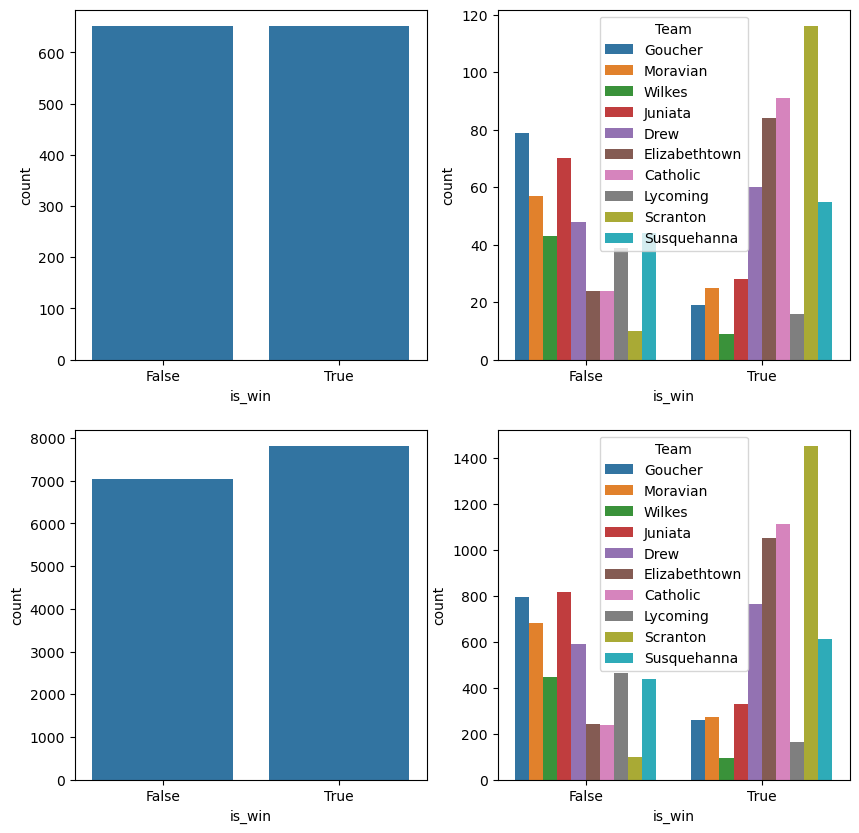

In [17]:
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (10,10))

sns.countplot(data=team_stats, x='is_win', ax=axes[0][0])
sns.countplot(data=team_stats[team_stats['Team'].apply(lambda team: team in conference_teams)], x='is_win', hue='Team', ax=axes[0][1])
sns.countplot(data=player_stats, x='is_win', ax=axes[1][0])
sns.countplot(data=player_stats[player_stats['Team'].apply(lambda team: team in conference_teams)], x='is_win', hue='Team', ax=axes[1][1])

##### There is clearly more games recorded with teams that are within conference vs out of conference.

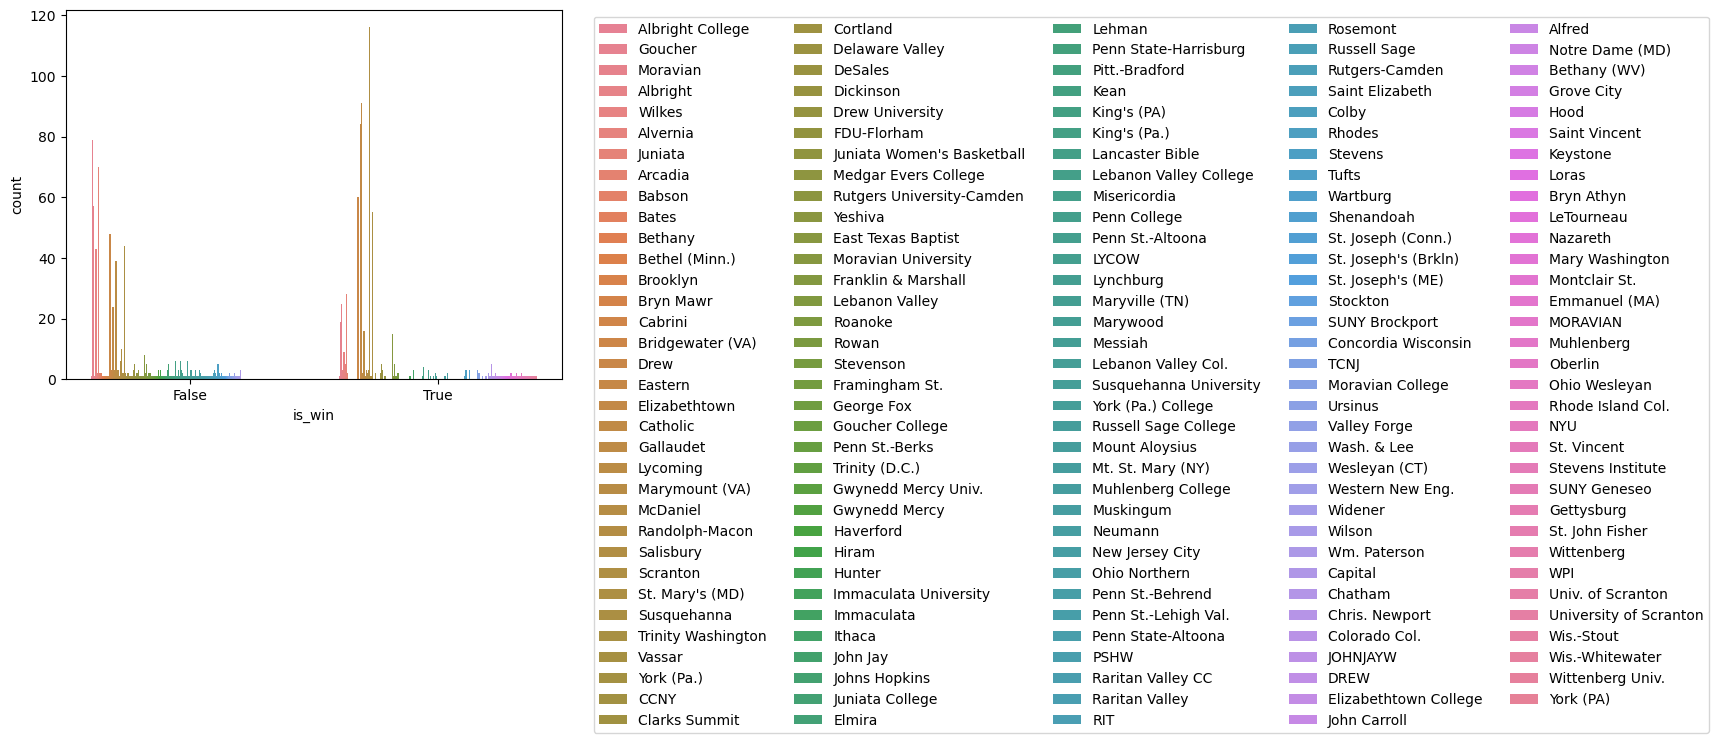

In [18]:
sns.countplot(data=team_stats, x='is_win', hue='Team')

plt.legend(bbox_to_anchor=(1.05, 1), ncol=5)

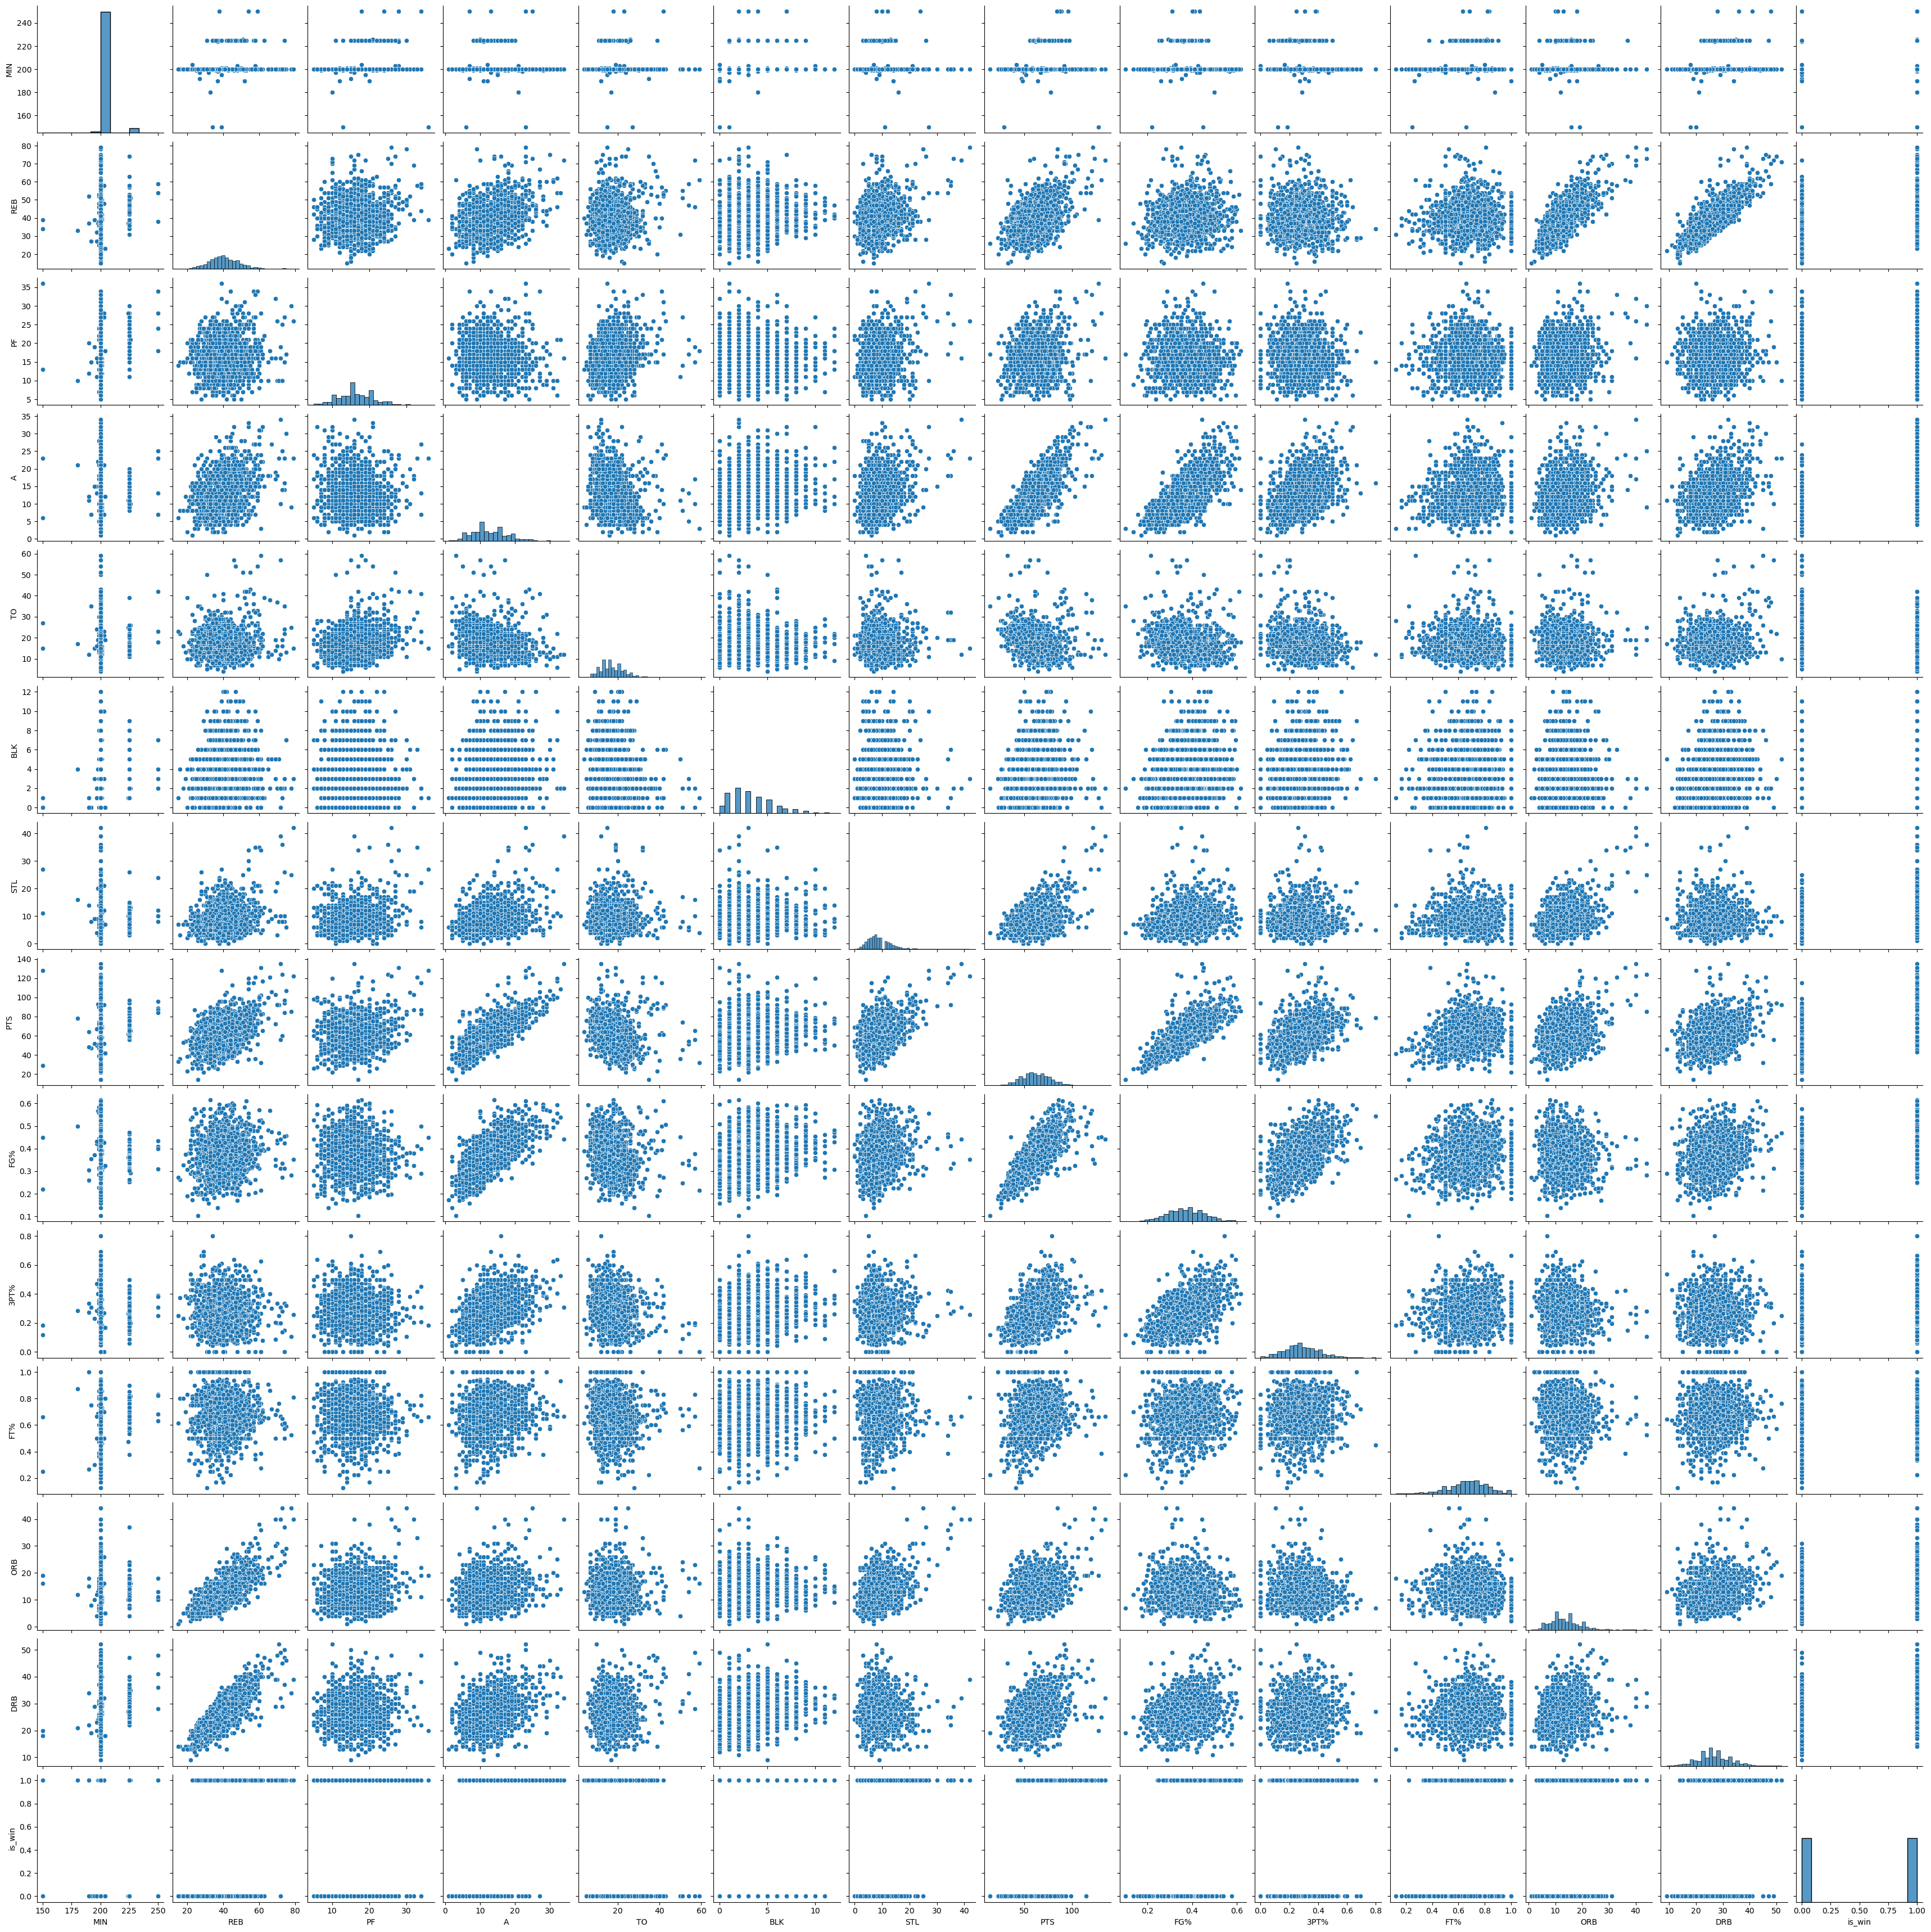

In [19]:
sns.pairplot(data=team_stats)

##### Points, Steals, Attempts, and Rebounds are more than negligibly positively correlated with winning, whereas Turnovers are noticably negatively correlated.

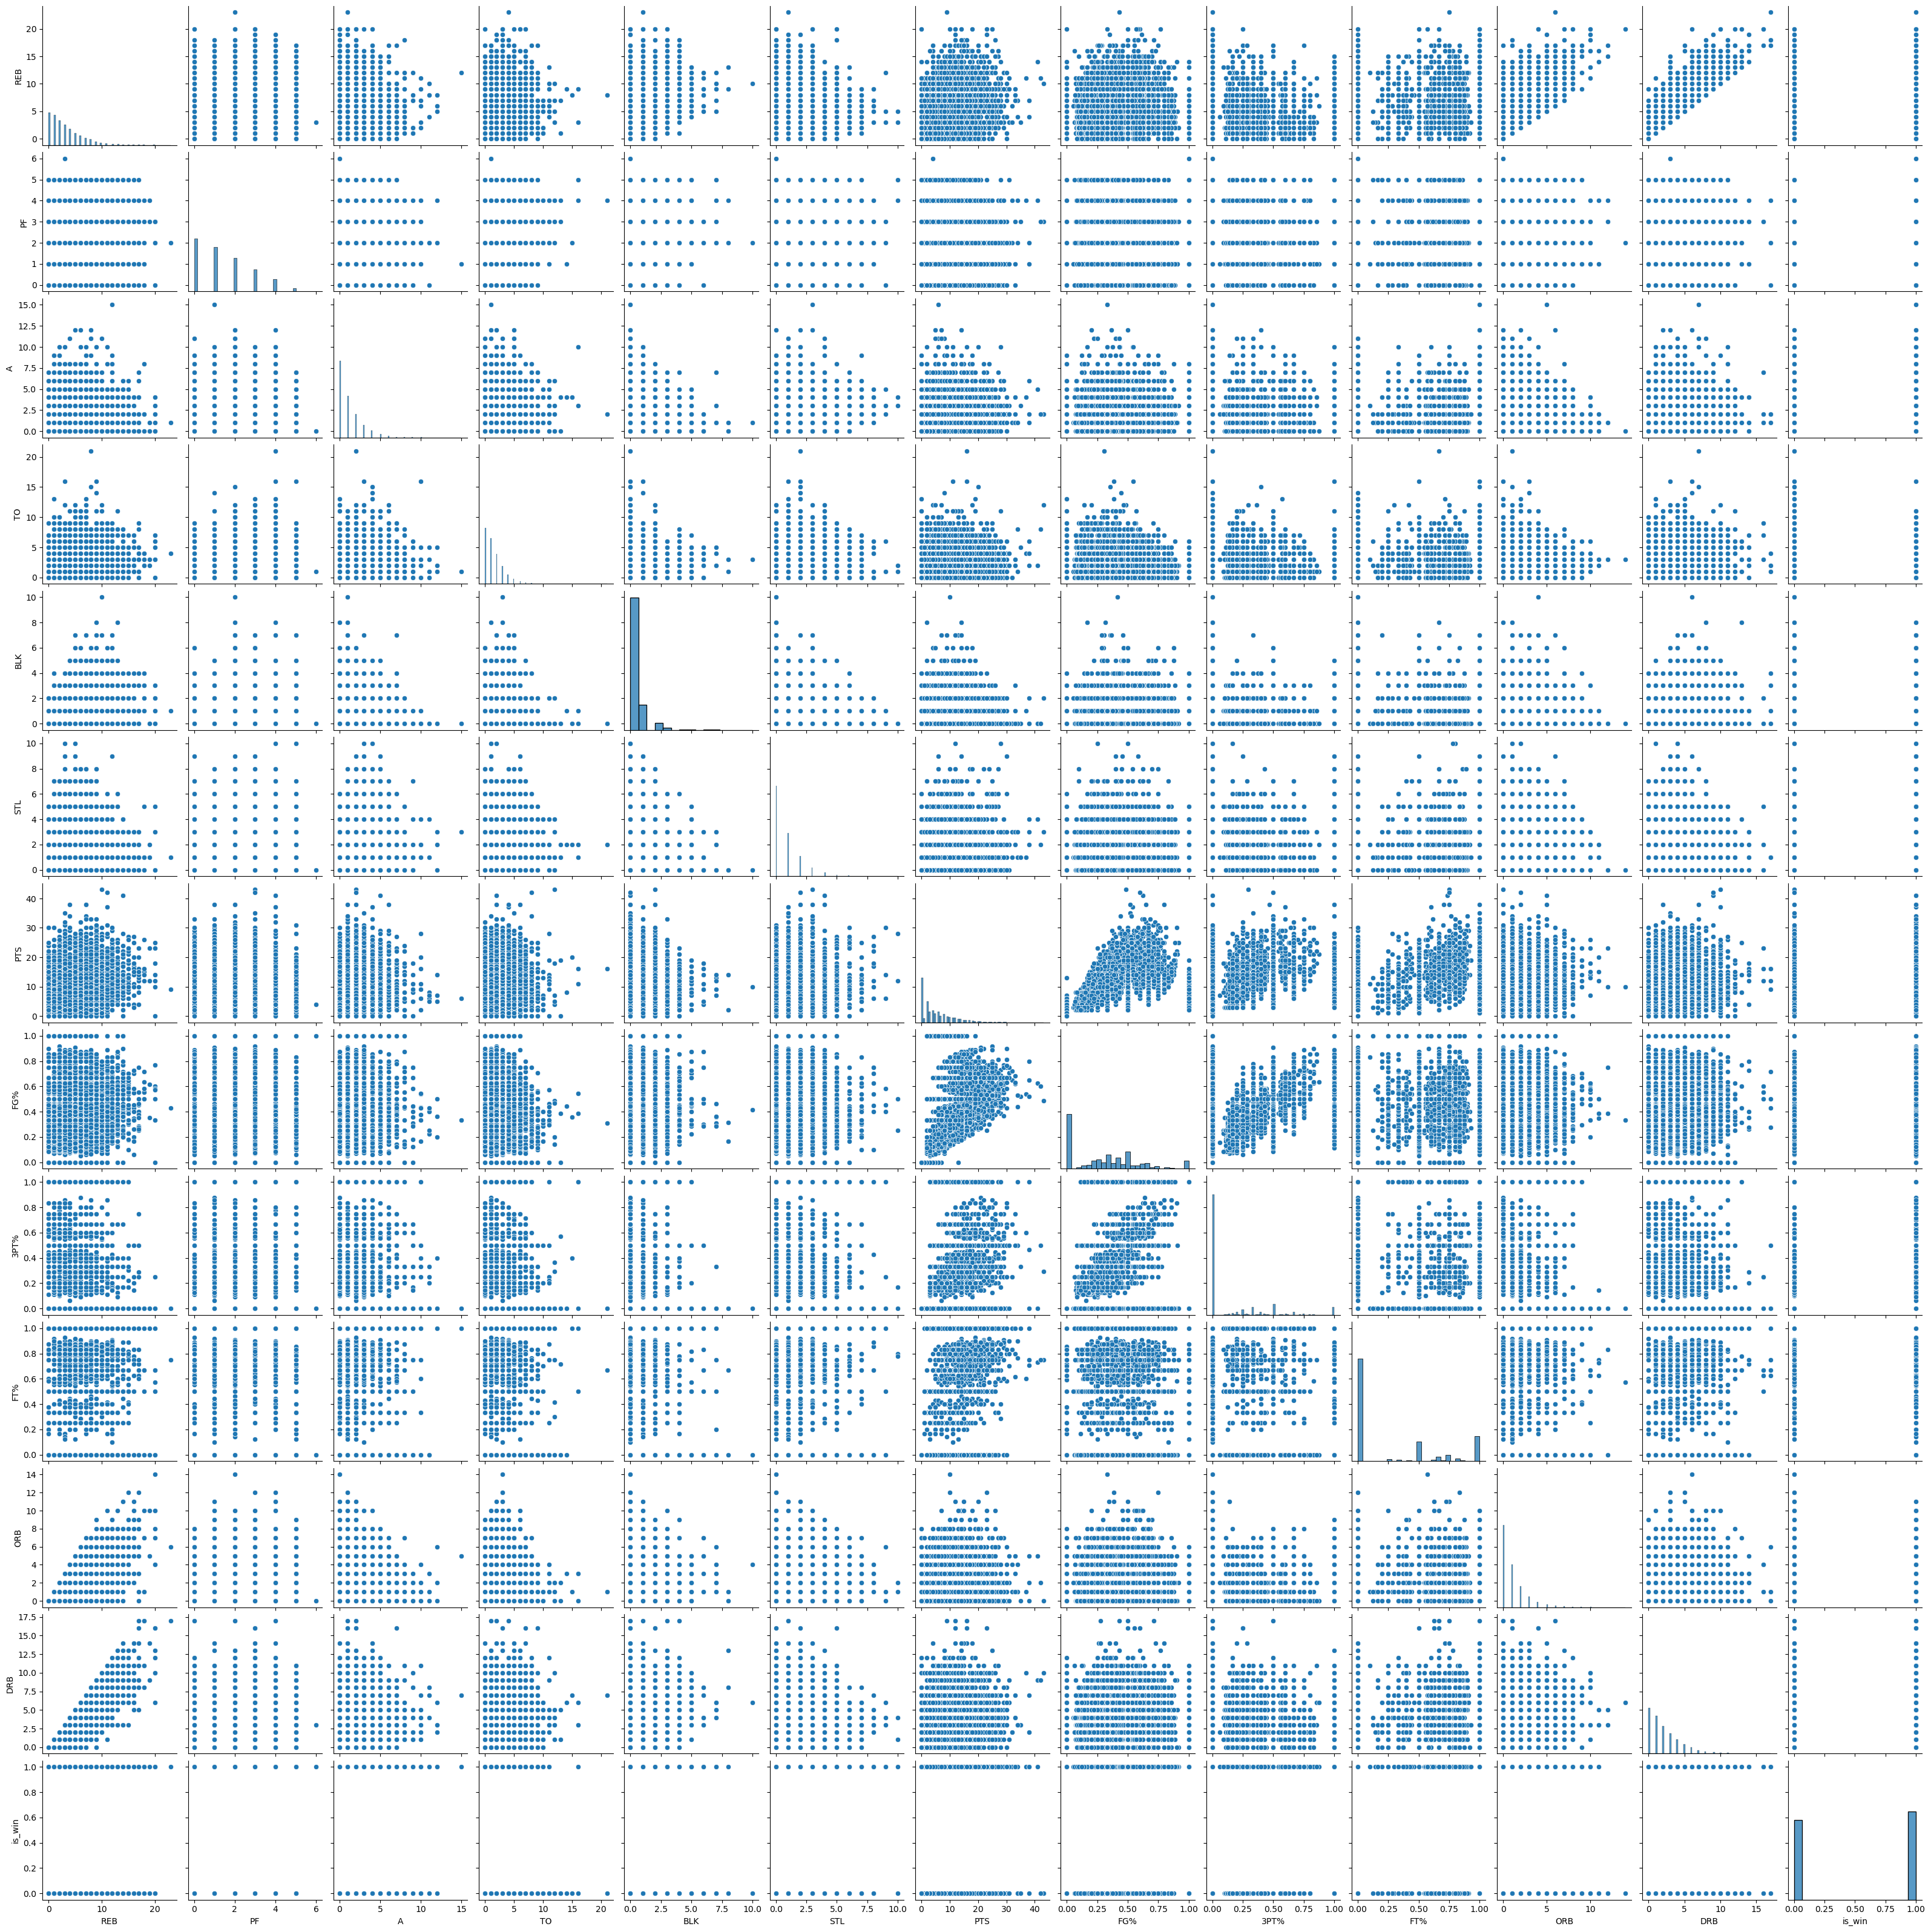

In [20]:
sns.pairplot(data=player_stats)

##### Not too many individual correlations; same correlations though on a smaller degree. Points and steals do not seem to be as impactful. 

Text(0.5, 1.0, 'Distribution of Conference Team game points')

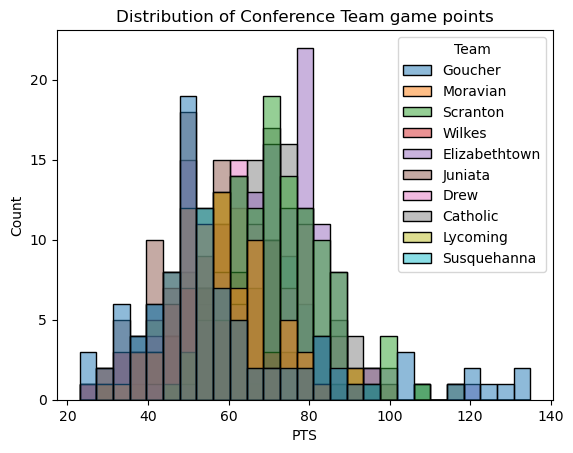

In [21]:
sns.histplot(data=team_stats[team_stats['Team'].apply(lambda team: team in conference_teams)], x='PTS', hue='Team')
plt.title('Distribution of Conference Team game points')

##### The graph shows how different conference teams scored in their games. Most teams scored between 60 and 70 points, which was the most common range. Catholic and Scranton often scored higher, reaching into the 80s and 90s, showing strong performance. Teams like Goucher, Moravian, and Juniata usually had lower scores between 40 and 60 points. While many teams had similar midrange scores, Catholic stood out as one of the most consistent high scorers, showing a clear difference in performance across the conference.

Text(0.5, 1.0, 'Distribution of All Teams game points')

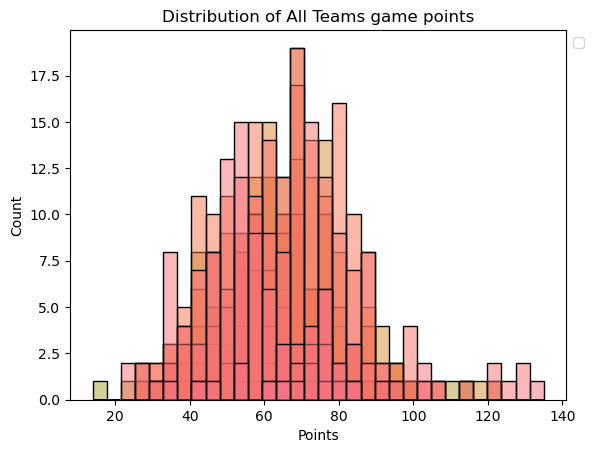

In [22]:
ax = sns.histplot(data=team_stats, x='PTS', hue='Team')
plt.legend(bbox_to_anchor=(1.05, 1), ncol=5)
plt.xlabel('Points')
plt.title('Distribution of All Teams game points')

##### Most teams scored between 50 and 70 points, showing that game performances were fairly even. Only a few teams scored much higher or lower, meaning most games were competitive.

In [23]:
player_stats.columns

Index(['##', 'Player', 'MIN', 'REB', 'PF', 'A', 'TO', 'BLK', 'STL', 'PTS',
       'Team', 'game_id', 'FG%', '3PT%', 'FT%', 'ORB', 'DRB', 'is_win'],
      dtype='object')

In [24]:
team_stats.columns

Index(['game_id', 'Team', 'Home/Away', 'Date', 'Site', 'MIN', 'REB', 'PF', 'A',
       'TO', 'BLK', 'STL', 'PTS', 'FG%', '3PT%', 'FT%', 'ORB', 'DRB',
       'is_win'],
      dtype='object')

In [25]:
conf_teams = team_stats[team_stats['Team'].apply(lambda team: team in conference_teams)]

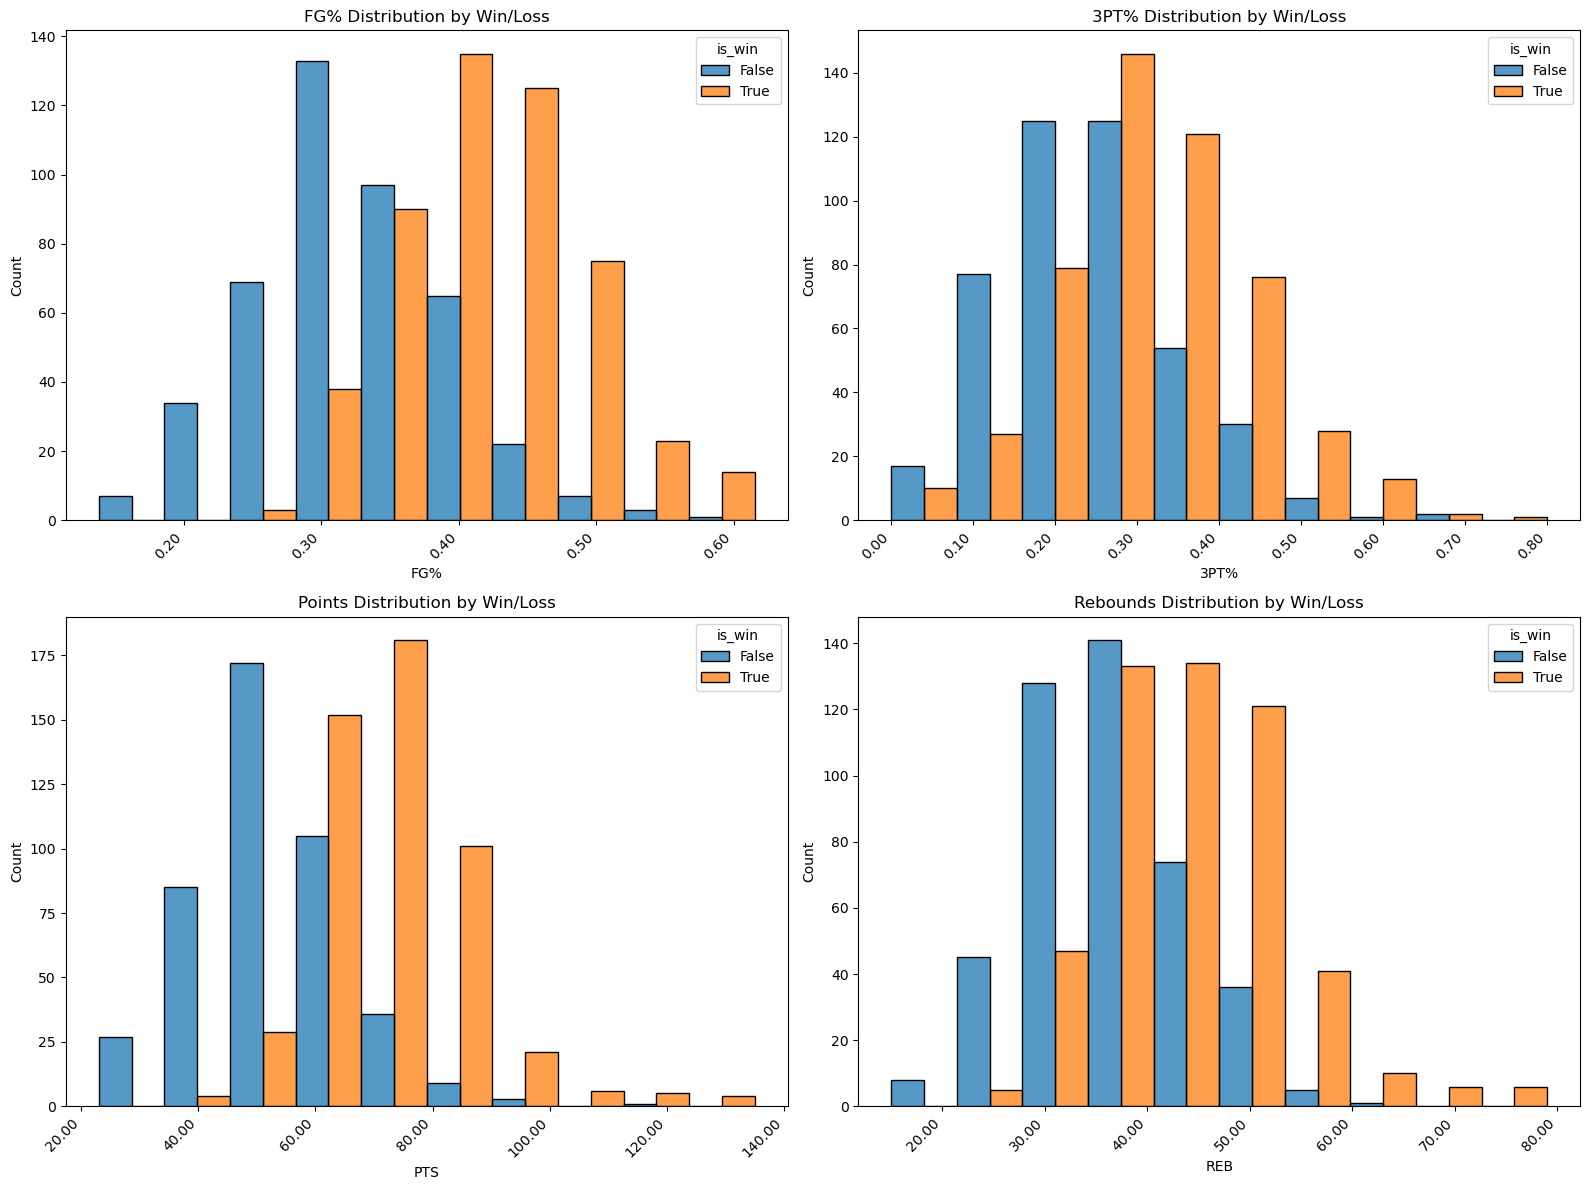

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# FG%
sns.histplot(data=conf_teams, x='FG%', hue='is_win', multiple='dodge', bins=10, ax=axes[0,0])
axes[0,0].set_title('FG% Distribution by Win/Loss')

# 3PT%
sns.histplot(data=conf_teams, x='3PT%', hue='is_win', multiple='dodge', bins=10, ax=axes[0,1])
axes[0,1].set_title('3PT% Distribution by Win/Loss')

# Points
sns.histplot(data=conf_teams, x='PTS', hue='is_win', multiple='dodge', bins=10, ax=axes[1,0])
axes[1,0].set_title('Points Distribution by Win/Loss')

# Rebounds
sns.histplot(data=conf_teams, x='REB', hue='is_win', multiple='dodge', bins=10, ax=axes[1,1])
axes[1,1].set_title('Rebounds Distribution by Win/Loss')

# Rotate x-axis labels for readability
for ax in axes.flatten():
    ax.set_xticklabels([f"{x:.2f}" for x in ax.get_xticks()], rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### This graph easily shows the difference between team that win vs those that lose. It highlights 4 of the most prominent actions that a player on a team can make while on offense

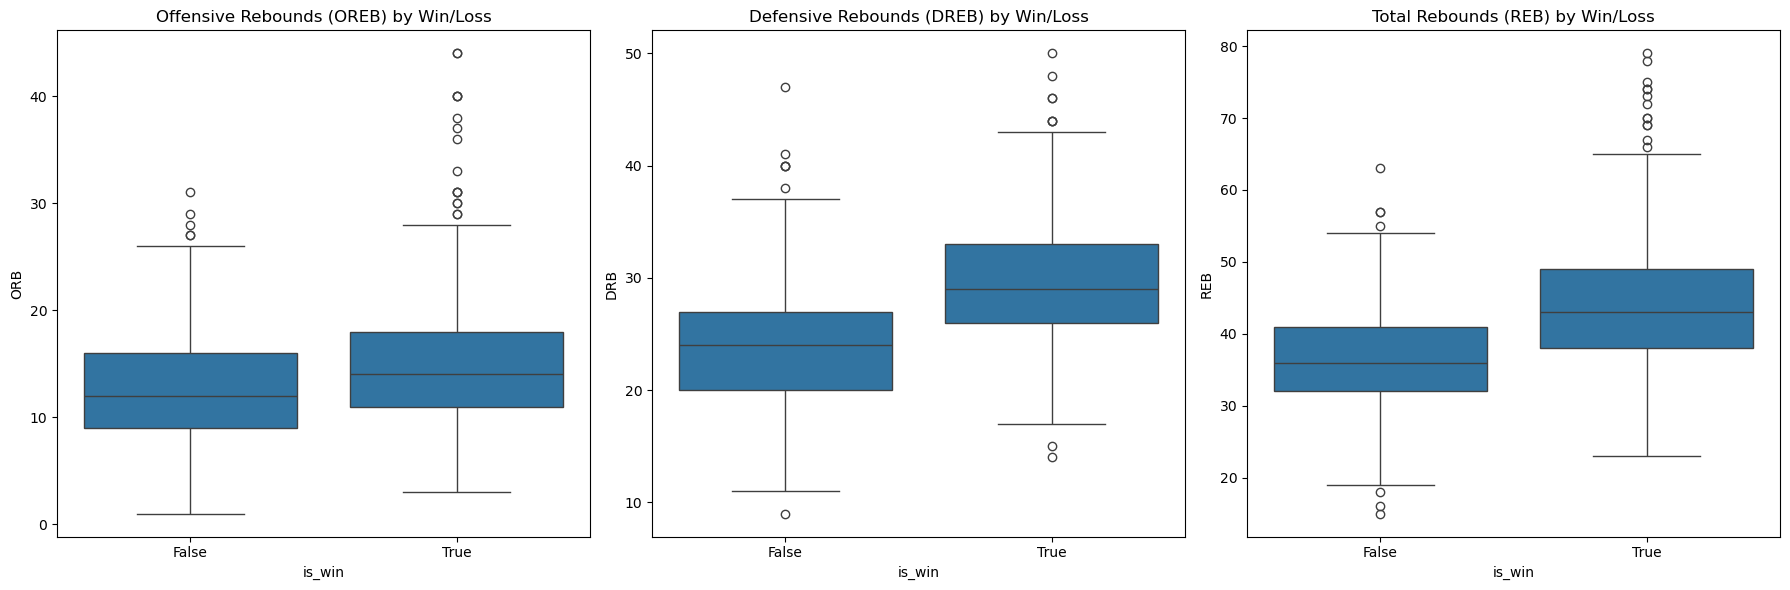

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Offensive Rebounds
sns.boxplot(data=conf_teams, x='is_win', y='ORB', ax=axes[0])
axes[0].set_title('Offensive Rebounds (OREB) by Win/Loss')

# Defensive Rebounds
sns.boxplot(data=conf_teams, x='is_win', y='DRB', ax=axes[1])
axes[1].set_title('Defensive Rebounds (DREB) by Win/Loss')

# Total Rebounds
sns.boxplot(data=conf_teams, x='is_win', y='REB', ax=axes[2])
axes[2].set_title('Total Rebounds (REB) by Win/Loss')

plt.tight_layout()
plt.show()

##### This graph easily shows the difference between team that win vs those that lose. It highlights 3 ways a team can rebound a ball

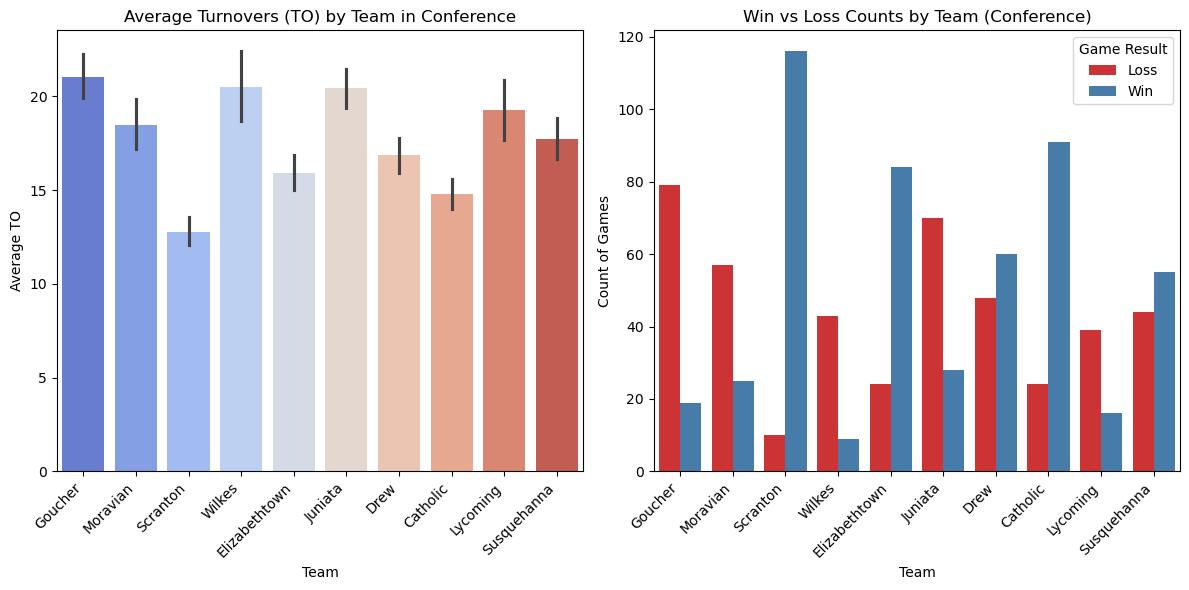

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.barplot(data=conf_teams, x='Team', y='TO', palette='coolwarm', ax=ax[0])
ax[0].set_title('Average Turnovers (TO) by Team in Conference')
ax[0].set_ylabel('Average TO')
ax[0].set_xlabel('Team')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(data=conf_teams, x='Team', hue='is_win', ax=ax[1], palette='Set1')
ax[1].set_title('Win vs Loss Counts by Team (Conference)')
ax[1].set_xlabel('Team')
ax[1].set_ylabel('Count of Games')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].legend(title='Game Result', labels=['Loss', 'Win'])
plt.tight_layout()
plt.show()


#### Teams with lower turnovers tend to win more games, reinforcing the importance of limiting mistakes for success.

## Model Testing

### Logistic Regression

In [35]:
num_cols = ['MIN', 'REB', 'PF', 'A',
       'TO', 'BLK', 'STL', 'PTS', 'FG%', '3PT%', 'FT%', 'ORB', 'DRB',]

X = team_stats[num_cols]
y = team_stats['is_win']

In [49]:
X

MIN  REB  PF   A  TO  BLK  STL  PTS       FG%      3PT%       FT%  ORB  \
0   200   51  12  12  17    5    3   64  0.338983  0.181818  0.709677   21   
1   200   36  24  17  11    7    6   66  0.414286  0.444444  0.500000   13   
0   200   60  15  20  21    2   13   85  0.397590  0.333333  0.619048   29   
1   200   35  22   8  32    1    9   49  0.339623  0.350000  0.428571    7   
0   200   39  16  11  20    6    6   67  0.464286  0.444444  0.647059   13   
..  ...  ...  ..  ..  ..  ...  ...  ...       ...       ...       ...  ...   
1   200   37  14  20  11    5    6   68  0.411765  0.208333  0.875000   16   
0   200   38  25   9  16    2    7   56  0.350000  0.600000  0.444444    9   
1   200   41  20  11  22    5    5   59  0.375000  0.272727  0.629630    7   
0   200   41  24  17  21   12    6   73  0.481481  0.388889  0.700000    9   
1   200   31  17  12  15    3   12   57  0.293103  0.307692  0.760000   11   

    DRB  
0    30  
1    23  
0    31  
1    28  
0    26  
..  ...  
1    21  
0    29  
1    34  
0    32  
1    20  

[1302 rows x 13 columns]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

pred_y = log.predict(X_test_scaled)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))

[[108  16]
 [ 16 121]]
              precision    recall  f1-score   support

       False       0.87      0.87      0.87       124
        True       0.88      0.88      0.88       137

    accuracy                           0.88       261
   macro avg       0.88      0.88      0.88       261
weighted avg       0.88      0.88      0.88       261



In [74]:
from sklearn.model_selection import cross_val_score
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(
    log, X, y, scoring='neg_mean_squared_error', cv=10
)

In [75]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(log, X, y, scoring='neg_mean_squared_error', cv=50)

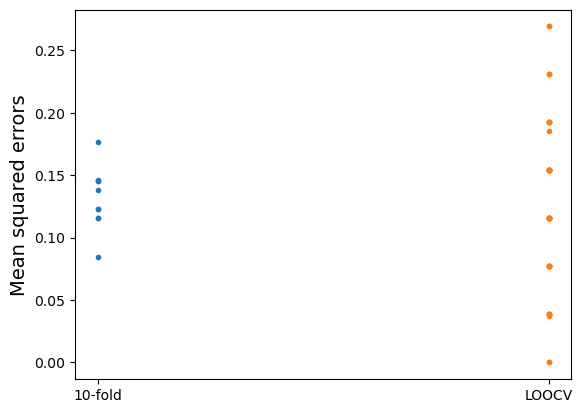

In [76]:
# Plot the errors for both scores
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14);
plt.xticks([0, 1], ['10-fold', 'LOOCV']);

In [78]:
log.coef_

array([[-0.35983432,  1.13575055, -0.76567665,  0.07114452, -1.70331751,
         0.30860444,  1.54252062, -0.03418263,  2.26611593,  0.45039918,
         0.52737775,  0.32148058,  1.38579681]])

##### Redo using imputed values comparing two teams

In [83]:
team_stats.shape

(1302, 19)

In [134]:
homes = team_stats[team_stats['Home/Away']=='home'].reset_index()
homes.drop(columns=['index', 'game_id', 'Team', 'Date', 'Site'], inplace=True)
homes.columns = ['Home/Away', 'home_MIN', 'home_REB', 'home_PF', 'home_A',
       'home_TO', 'home_BLK', 'home_STL', 'home_PTS', 'home_FG%', 'home_3PT%', 'home_FT%', 'home_ORB', 'home_DRB',
       'home_win']
aways = team_stats[team_stats['Home/Away']=='away'].reset_index()
aways.drop(columns=['index', 'game_id', 'Team', 'Home/Away', 'Date', 'Site', 'is_win'], inplace=True)
aways.columns = ['away_MIN', 'away_REB', 'away_PF', 'away_A',
       'away_TO', 'away_BLK', 'away_STL', 'away_PTS', 'away_FG%', 'away_3PT%', 'away_FT%', 'away_ORB', 'away_DRB']

teams_compared_basic = pd.concat([homes, aways], axis=1)
teams_compared_basic['Home/Away'] = teams_compared_basic['Home/Away'].apply(lambda x: True if x=='home' else False)
teams_compared_basic

Home/Away  home_MIN  home_REB  home_PF  home_A  home_TO  home_BLK  \
0         True       200        51       12      12       17         5   
1         True       200        60       15      20       21         2   
2         True       200        39       16      11       20         6   
3         True       200        27       14       6       21         0   
4         True       200        46       27      13       18         0   
..         ...       ...       ...      ...     ...      ...       ...   
646       True       200        41       23      13       14         2   
647       True       200        38       13      11       20         3   
648       True       200        37        9      18       18         2   
649       True       200        38       25       9       16         2   
650       True       200        41       24      17       21        12   

     home_STL  home_PTS  home_FG%  ...  away_A  away_TO  away_BLK  away_STL  \
0           3        64  0.338983  ...      17       11         7         6   
1          13        85  0.397590  ...       8       32         1         9   
2           6        67  0.464286  ...      10       15         4         8   
3           8        43  0.270833  ...      19       11         6        15   
4          12        77  0.436620  ...       4       22         3         8   
..        ...       ...       ...  ...     ...      ...       ...       ...   
646         9        64  0.333333  ...      15       20         2         9   
647        10        58  0.333333  ...      19       21         2         7   
648         2        52  0.377358  ...      20       11         5         6   
649         7        56  0.350000  ...      11       22         5         5   
650         6        73  0.481481  ...      12       15         3        12   

     away_PTS  away_FG%  away_3PT%  away_FT%  away_ORB  away_DRB  
0          66  0.414286   0.444444  0.500000        13        23  
1          49  0.339623   0.350000  0.428571         7        28  
2          58  0.328358   0.176471  0.785714        20        20  
3          86  0.522388   0.409091  0.437500        17        29  
4          54  0.340426   0.157895  0.678571         4        27  
..        ...       ...        ...       ...       ...       ...  
646        59  0.489796   0.250000  0.416667         9        28  
647        78  0.475410   0.562500  0.647059        13        28  
648        68  0.411765   0.208333  0.875000        16        21  
649        59  0.375000   0.272727  0.629630         7        34  
650        57  0.293103   0.307692  0.760000        11        20  

[651 rows x 28 columns]

In [322]:
# num_cols = ['MIN', 'REB', 'PF', 'A',
#        'TO', 'BLK', 'STL', 'PTS', 'FG%', '3PT%', 'FT%', 'ORB', 'DRB',]

def evaluate_logistic(df, input_cols, output_cols):
    df = df.copy()
    X = df[input_cols]
    y = df[output_cols]
    
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    from sklearn.linear_model import LogisticRegression
    
    log = LogisticRegression()
    log.fit(X_train_scaled, y_train)
    
    pred_y = log.predict(X_test_scaled)
    
    from sklearn.metrics import confusion_matrix, classification_report
    
    print(confusion_matrix(y_test, pred_y))
    print(classification_report(y_test, pred_y))


    # Cross validation 
    from sklearn.model_selection import cross_val_score
    # neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
    ten_fold_scores = -cross_val_score(
        log, X, y, scoring='neg_mean_squared_error', cv=10
    )
    
    # neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
    LOOCV_scores = -cross_val_score(log, X, y, scoring='neg_mean_squared_error', cv=30)
    
    # Plot the errors for both scores
    plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
    plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
    plt.ylabel('Mean squared errors', fontsize=14);
    plt.xticks([0, 1], ['10-fold', 'LOOCV']);

[[68  2]
 [ 3 58]]
              precision    recall  f1-score   support

       False       0.96      0.97      0.96        70
        True       0.97      0.95      0.96        61

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



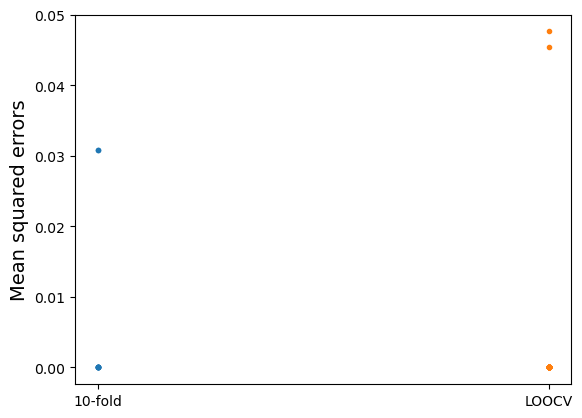

In [162]:
# Model evaluating head to head competition using stats of current game
x_cols = list(teams_compared_basic.columns)
x_cols.remove('home_win')
y_cols = 'home_win'
evaluate_logistic(teams_compared_basic, x_cols, y_cols)

#### Calculate rolling averages of past games for the team and top player of each team to use to calculate winner of upcoming game.

In [589]:


df = team_stats.copy()

# Train on only conference teams to allow full rolling 5 game window
# df = team_stats[team_stats['Team'].apply(lambda team: team in conference_teams)].copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Team', 'Date'])
df.reset_index(drop=True, inplace=True)

# Select columns you want to compute rolling averages on
rolling_stats_cols = ['PTS', 'REB', 'A', 'TO', 'STL', 'BLK', 'PF', 'FG%', '3PT%', 'FT%', 'ORB', 'DRB', 'is_win']

# Compute rolling averages (last 5 games, excluding current game)
df_rolling = (
    df.groupby('Team')[rolling_stats_cols]
    .rolling(window=5, min_periods=2, closed="left")
    .mean()
    .reset_index()
)

# Merge back into original df
for col in rolling_stats_cols:
    df[f'{col}_rolling_5'] = df_rolling[col]

df = df.dropna(axis=0)



df_team = team_stats[team_stats['Team'].apply(lambda team: team in conference_teams)].copy()
df_player = player_stats[player_stats['Team'].apply(lambda team: team in conference_teams)].copy()
df_team_dates = df_team[['game_id', 'Date']].drop_duplicates()

df_player = df_player.merge(
    df_team_dates,
    on='game_id',
    how='left'
)


df_player['Date'] = pd.to_datetime(df_player['Date'])
df_player = df_player.sort_values(by=['Player', 'Date'])

player_rolling_cols = ['PTS', 'REB', 'A', 'TO', 'STL', 'BLK', 'PF',
                       'FG%', '3PT%', 'FT%', 'ORB', 'DRB']

player_rolling = (
    df_player.groupby('Player')[player_rolling_cols]
    .rolling(window=5, min_periods=3, closed="left")    # <= EXCLUDES current game
    .mean()
    .reset_index()
)

# display(player_rolling)
df_player.reset_index(drop=True, inplace=True)
for col in df_player.columns:
    if col not in ['game_id', 'Team', 'Date']:
        df_player.rename(columns={col: f'{col}_player'}, inplace=True)
for col in player_rolling_cols:
    df_player[f'{col}_rolling_5_player'] = player_rolling[col]

df_player.dropna(axis=0, inplace=True)
players_max_rollings = df_player.groupby(['game_id','Team','Date']).max()


df.columns
df = df.merge(
    players_max_rollings,
    on=['game_id', 'Team', 'Date'],
    how='left'
)
df.columns




# Split dataframe into two views: one per game per team
team_a = df[df['Home/Away'] == 'home'].copy()
team_b = df[df['Home/Away'] == 'away'].copy()

# Merge home team (A) and away team (B) on game_id
matchups = team_a.merge(
    team_b,
    on=['game_id','Date'],
    suffixes=('_A', '_B')
)

feature_cols_team = [
    'PTS_rolling_5', 'REB_rolling_5', 'A_rolling_5', 'TO_rolling_5', 'STL_rolling_5',
    'BLK_rolling_5', 'PF_rolling_5', 'FG%_rolling_5', '3PT%_rolling_5', 'FT%_rolling_5',
    'ORB_rolling_5', 'DRB_rolling_5', 'is_win_rolling_5'
]
feature_cols_players = [
    'PTS_rolling_5_player', 'REB_rolling_5_player', 'A_rolling_5_player', 'TO_rolling_5', 'STL_rolling_5_player',
    'BLK_rolling_5_player', 'PF_rolling_5_player', 'FG%_rolling_5_player', '3PT%_rolling_5', 'FT%_rolling_5_player',
    'ORB_rolling_5_player', 'DRB_rolling_5_player'
]

# display(matchups.columns)
rolling_matchups = matchups[
    ['game_id', 'Date', 'Team_A', 'Team_B', 'is_win_A'] +  # keep winner label
    [f"{c}_A" for c in feature_cols_team] +
    [f"{c}_B" for c in feature_cols_team] +
    [f"{c}_A" for c in feature_cols_players] +
    [f"{c}_B" for c in feature_cols_players]
].copy()
rolling_matchups.columns

rolling_matchups.rename(columns={"is_win_A": "label"}, inplace=True)
rolling_matchups['label'] = rolling_matchups['label'].astype(int)


rolling_matchups.isnull().sum()
rolling_matchups.dropna(axis=0, inplace=True)
display(rolling_matchups.columns)
rolling_matchups

Index(['game_id', 'Date', 'Team_A', 'Team_B', 'label', 'PTS_rolling_5_A',
       'REB_rolling_5_A', 'A_rolling_5_A', 'TO_rolling_5_A', 'STL_rolling_5_A',
       'BLK_rolling_5_A', 'PF_rolling_5_A', 'FG%_rolling_5_A',
       '3PT%_rolling_5_A', 'FT%_rolling_5_A', 'ORB_rolling_5_A',
       'DRB_rolling_5_A', 'is_win_rolling_5_A', 'PTS_rolling_5_B',
       'REB_rolling_5_B', 'A_rolling_5_B', 'TO_rolling_5_B', 'STL_rolling_5_B',
       'BLK_rolling_5_B', 'PF_rolling_5_B', 'FG%_rolling_5_B',
       '3PT%_rolling_5_B', 'FT%_rolling_5_B', 'ORB_rolling_5_B',
       'DRB_rolling_5_B', 'is_win_rolling_5_B', 'PTS_rolling_5_player_A',
       'REB_rolling_5_player_A', 'A_rolling_5_player_A', 'TO_rolling_5_A',
       'STL_rolling_5_player_A', 'BLK_rolling_5_player_A',
       'PF_rolling_5_player_A', 'FG%_rolling_5_player_A', '3PT%_rolling_5_A',
       'FT%_rolling_5_player_A', 'ORB_rolling_5_player_A',
       'DRB_rolling_5_player_A', 'PTS_rolling_5_player_B',
       'REB_rolling_5_player_B', 'A_rol

game_id       Date    Team_A       Team_B  label  \
4          Catholic_Drew_2-24-2021 2021-02-24  Catholic         Drew      1   
5       Catholic_Scranton_3-6-2021 2021-03-06  Catholic     Scranton      0   
7    Catholic_Susquehanna_1-8-2022 2022-01-08  Catholic  Susquehanna      1   
8       Catholic_Juniata_1-19-2022 2022-01-19  Catholic      Juniata      1   
9      Catholic_Moravian_1-22-2022 2022-01-22  Catholic     Moravian      1   
..                             ...        ...       ...          ...    ...   
416      Wilkes_Moravian_1-22-2025 2025-01-22    Wilkes     Moravian      0   
417      Wilkes_Catholic_1-25-2025 2025-01-25    Wilkes     Catholic      0   
418    Wilkes_Susquehanna_2-8-2025 2025-02-08    Wilkes  Susquehanna      0   
419          Wilkes_Drew_2-12-2025 2025-02-12    Wilkes         Drew      0   
420       Wilkes_Goucher_2-22-2025 2025-02-22    Wilkes      Goucher      0   

     PTS_rolling_5_A  REB_rolling_5_A  A_rolling_5_A  TO_rolling_5_A  \
4               61.0             38.2           10.8            14.6   
5               64.4             36.4           12.4            15.2   
7               64.0             39.6            9.6            15.6   
8               63.4             41.2            9.8            14.6   
9               66.2             43.6           12.0            15.8   
..               ...              ...            ...             ...   
416             51.6             41.6            7.2            23.2   
417             58.0             40.4            8.2            22.4   
418             49.0             33.8            7.8            20.0   
419             48.6             32.8            7.0            18.8   
420             52.0             32.8            8.2            16.6   

     STL_rolling_5_A  ...  A_rolling_5_player_B  TO_rolling_5_B  \
4               10.4  ...              6.666667       21.666667   
5               11.2  ...              2.800000       17.200000   
7               10.8  ...              3.200000       15.800000   
8               13.8  ...              3.000000       17.400000   
9               15.6  ...              5.000000       15.200000   
..               ...  ...                   ...             ...   
416             11.0  ...              1.200000       17.400000   
417             11.4  ...              3.600000       17.000000   
418              9.2  ...              5.000000       18.600000   
419              9.0  ...              3.000000       17.200000   
420              5.8  ...              1.800000       17.600000   

     STL_rolling_5_player_B  BLK_rolling_5_player_B  PF_rolling_5_player_B  \
4                       3.0                1.666667               2.333333   
5                       1.8                2.200000               3.200000   
7                       1.0                1.800000               2.000000   
8                       1.4                0.600000               3.400000   
9                       1.6                1.000000               2.800000   
..                      ...                     ...                    ...   
416                     1.6                0.800000               3.600000   
417                     2.2                2.400000               2.400000   
418                     2.0                1.400000               2.800000   
419                     1.6                1.600000               2.400000   
420                     3.4                0.600000               3.800000   

     FG%_rolling_5_player_B  3PT%_rolling_5_B  FT%_rolling_5_player_B  \
4                  0.676557          0.334314                0.666667   
5                  0.547619          0.295378                0.700000   
7                  0.517540          0.390526                0.200000   
8                  0.480000          0.299635                0.500000   
9                  0.466667          0.217753                1.000000   
..                      ...      

In [666]:
players_max_rollings = df_player.groupby(['game_id','Team','Date']).max()
players_max_rollings
df_player.groupby(['game_id','Team','Date']).apply(lambda x: x.sort_values(ascending=False).iloc[0])

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

[[21  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.77      0.82      0.79        33

    accuracy                           0.77        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.77      0.77      0.77        62



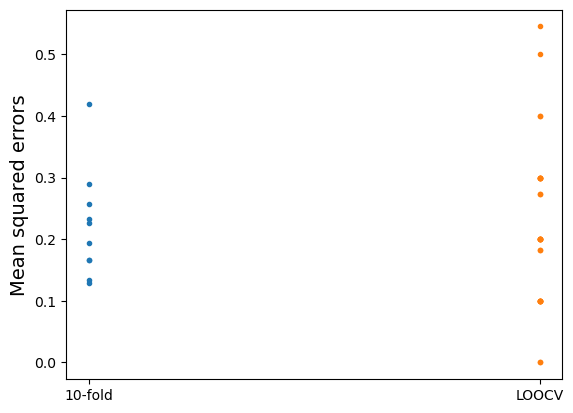

In [588]:
# Model evaluating past rolling averages of 5 for matchups

df_rolling_matchups = rolling_matchups.copy()
df_rolling_matchups.drop(columns=['game_id', 'Date', 'Team_A', 'Team_B'], inplace=True)
x_cols = list(df_rolling_matchups.columns)
x_cols.remove('label')
y_cols = 'label'
evaluate_logistic(df_rolling_matchups, x_cols, y_cols)

#### Evaluate Model paramters with PCA

[[22  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.86        34

    accuracy                           0.84        62
   macro avg       0.84      0.83      0.84        62
weighted avg       0.84      0.84      0.84        62



array([[ 8.29623754e-01,  2.67243479e-01,  1.95444460e-01, ...,
         1.73265602e-03, -2.93118560e-03, -5.83175027e-03],
       [-2.49187656e-01, -8.35728468e-02, -4.47335082e-02, ...,
         1.62469206e-03,  5.39796282e-03,  8.42797096e-03],
       [ 2.02820765e-02,  2.88295824e-01, -1.18678496e-01, ...,
         6.68595961e-04, -3.33631431e-02, -1.86585789e-03],
       ...,
       [ 0.00000000e+00, -4.04285627e-03, -4.97866177e-16, ...,
         9.58434720e-17, -2.77555756e-17, -1.04083409e-17],
       [-0.00000000e+00, -4.97934481e-03, -1.34286815e-16, ...,
         2.87096735e-16,  1.87350135e-16,  3.19189120e-16],
       [-0.00000000e+00, -4.13894006e-06,  1.00385440e-16, ...,
        -3.28187998e-16,  5.81132364e-17,  1.46584134e-16]])

['PTS_rolling_5_A', 'REB_rolling_5_A', 'A_rolling_5_A', 'TO_rolling_5_A', 'STL_rolling_5_A', 'BLK_rolling_5_A', 'PF_rolling_5_A', 'FG%_rolling_5_A']
using: 8
[[18 10]
 [11 23]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.70      0.68      0.69        34

    accuracy                           0.66        62
   macro avg       0.66      0.66      0.66        62
weighted avg       0.66      0.66      0.66        62



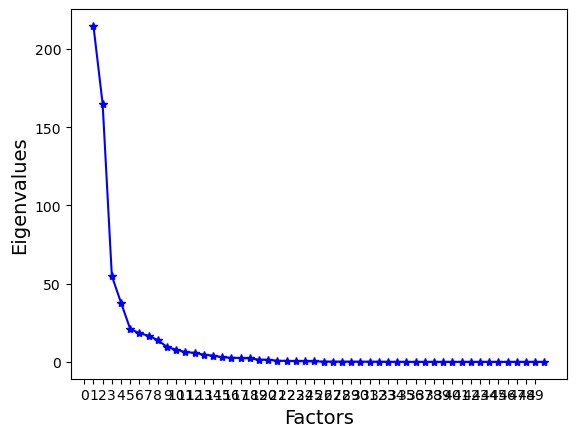

In [638]:
from sklearn.decomposition import PCA

for i in range(1):

    df = df_rolling_matchups.copy()
    X = df[x_cols]
    y = df[y_cols]
    
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=11001)
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    from sklearn.linear_model import LogisticRegression
    
    log = LogisticRegression()
    log.fit(X_train_scaled, y_train)
    
    pred_y = log.predict(X_test_scaled)
    
    from sklearn.metrics import confusion_matrix, classification_report
    
    print(confusion_matrix(y_test, pred_y))
    print(classification_report(y_test, pred_y))


    # PCA
    pca = PCA(n_components=len(x_cols))
    principal_components = pca.fit_transform(X_train)
    # display(pd.DataFrame(pca.components_, columns=X_train.columns))
    display(pca.components_)

    # Skree plot
    xint = range(0, len(x_cols))
    plt.xticks(xint)
    plt.plot([i for i in range(1, len(pca.explained_variance_)+1)], pca.explained_variance_, 'b*-')
    plt.xlabel('Factors', fontsize='14');
    plt.ylabel('Eigenvalues', fontsize='14');

    # new_x_cols = np.array(x_cols)[pca.explained_variance_ratio_>0.001]
    new_x_cols = x_cols[0:8]
    print(new_x_cols)
    print('using: '+str(len(new_x_cols)))



    df = df_rolling_matchups.copy()
    X = df[new_x_cols]
    y = df[y_cols]
    
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=11001)
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    from sklearn.linear_model import LogisticRegression
    
    log = LogisticRegression()
    log.fit(X_train_scaled, y_train)
    
    pred_y = log.predict(X_test_scaled)
    
    from sklearn.metrics import confusion_matrix, classification_report
    
    print(confusion_matrix(y_test, pred_y))
    print(classification_report(y_test, pred_y))
    


In [627]:
np.array(x_cols)[pca.explained_variance_ratio_>0.005]

array(['PTS_rolling_5_A', 'REB_rolling_5_A', 'A_rolling_5_A',
       'TO_rolling_5_A', 'STL_rolling_5_A', 'BLK_rolling_5_A',
       'PF_rolling_5_A', 'FG%_rolling_5_A', '3PT%_rolling_5_A',
       'FT%_rolling_5_A', 'ORB_rolling_5_A', 'DRB_rolling_5_A',
       'is_win_rolling_5_A', 'PTS_rolling_5_B', 'REB_rolling_5_B'],
      dtype='<U22')